IA & Data science (LU3IN0226) -- 2023-2024
--------
*&copy; Equipe pédagogique: Téo Guichoux, Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# TD-TME10: apprentissage supervisé appliqué à un dataset

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Warintara MUNSUP 28707636
Snkar MAM 

Le nom de chaque membre du binôme doit être indiqué, et **un seul rendu sur un des deux comptes Moodle doit être fait**.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *tme-10-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# TDTME 10 - mini-projet 2024


<font size="+1" color="RED"><b>Date de rendu : lundi 29 avril 2024, avant 19h</b></font>
    
<b>Attention!</b> les soumissions après lundi 29 avril 19h se verront appliquer un malus dans la note:
- retard de moins d'une heure : 0 malus
- retard entre 1h et 24h : malus de 2pts
- retard entre 24h à 48h : malus de 5pts
- retard supérieur à 48h : noté 0.


## Travail à faire

Appliquer les algorithmes d'**apprentissage supervisé** vus depuis le début du semestre sur les données afin de mettre en évidence des résultats intéressants (temps d'exécution, taux de bonne classification,...).
Vous devez utiliser tout ce qui a été fait dans les séances de TDTME 1 à 8 et vous devez comparer les algorithmes suivantes:
- les k plus proches voisins
- le perceptron (n'importe quelle variante)
- les arbres de décision

Votre comparaison doit utiliser une validation croisée.


## Travail à rendre

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage.

Ce qui doit être remis : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.

**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.



In [12]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

from iads import arbre as ab

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'graphviz'

## Données pour le projet : Pen-Based Recognition of Handwritten Digits

documentation: <a href="https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits" target="NEW">page UCI</a> (mais l'essentiel est donné ci-après).

Pour télécharger les données, la façon la plus simple est d'installer la librairie de l'UCI:

    pip install -U ucimlrepo

ensuite, on peut lancer la boîte suivante.


In [ ]:
pip install -U ucimlrepo

Note: you may need to restart the kernel to use updated packages.


### Chargement des données

In [ ]:
from ucimlrepo import fetch_ucirepo,list_available_datasets

# check which datasets can be imported
#list_available_datasets()

# import dataset
pen_dataset = fetch_ucirepo(id=81)

# access data
X = pen_dataset.data.features
y = pen_dataset.data.targets

# access metadata
print(pen_dataset.metadata.uci_id)
print(pen_dataset.metadata.num_instances)
print(pen_dataset.metadata.additional_info.summary)

# access variable info in tabular format
print(pen_dataset.variables)

81
10992
We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds. 

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution.  Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to wr

In [ ]:
X[0:10]

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0
5,100,100,88,99,49,74,17,47,0,16,37,0,73,16,20,20
6,0,100,3,72,26,35,85,35,100,71,73,97,65,49,66,0
7,0,39,2,62,11,5,63,0,100,43,89,99,36,100,0,57
8,13,89,12,50,72,38,56,0,4,17,0,61,32,94,100,100
9,57,100,22,72,0,31,25,0,75,13,100,50,75,87,26,85


In [ ]:
y[0:10]

,Class
0,8
1,2
2,1
3,4
4,1
5,6
6,4
7,0
8,5
9,0


In [ ]:
np.unique(y.Class)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

## Expérimentations

In [ ]:
data_x = X.to_numpy()
data_y = y.to_numpy()

In [ ]:
nb_lig,nb_col = X.shape
X_np = np.array(X)
Y_np = np.array([y["Class"][i] for i in range(nb_lig)])
Y_np

array([8, 2, 1, ..., 0, 0, 4], dtype=int64)

C:\Users\sanga\AppData\Local\Temp\ipykernel_15268\4004294534.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x0 = X.iloc[0][i]
C:\Users\sanga\AppData\Local\Temp\ipykernel_15268\4004294534.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y0=X.iloc[0][i+1]
C:\Users\sanga\AppData\Local\Temp\ipykernel_15268\4004294534.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = X.iloc[0][i+2]
C:\Users\sanga\AppData\Local\Temp\ipykern

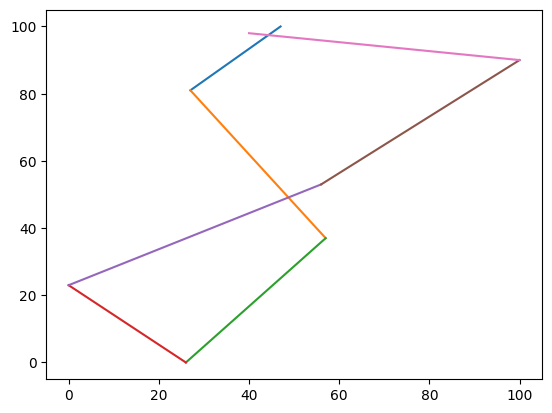

In [ ]:
import matplotlib.pyplot as plt
for i in range(0,13,2):
    x0 = X.iloc[0][i]
    y0=X.iloc[0][i+1]
    x1 = X.iloc[0][i+2]
    y1 = X.iloc[0][i+3]
    plt.plot([x0,x1],[y0,y1])
plt.show()



In [ ]:

np.random.seed(42)   # on prend 42 comme graine
k=5
knn = classif.ClassifierKNN(16,5)
perf, taux_moyen, taux_ecart = ev.validation_croisee(knn,(X_np,Y_np),10) 
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')


NameError: name 'classif' is not defined

In [ ]:
import random 
np.random.seed(42)   # on prend 42 comme graine


# Création d'un classifieur KNN de dimension 2:
KNN = classif.ClassifierKNN_MC(16,5,10)

# Par définition, ce classifieur n'a pas besoin d'entraînement
KNN.train(data_x,data_y)


# Classification du dataset (contrôle de predict et score):
print("Classification des exemples du dataset:")
# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset: ", KNN.accuracy(data_x,data_y))  

Classification des exemples du dataset:
Taux de bonne classification sur le dataset:  [0.99599709]


In [ ]:
input_dim = 16
eps = 1e5 
cl_biais = classif.ClassifierPerceptron(input_dim, learning_rate=0.01, init=True)
cl_mult_biais=classif.ClassifierMultiOAA(cl_biais)

cl_mult_biais.train(X_np, Y_np)

acc_perf = cl_mult_biais.accuracy(X_np, Y_np)
perf, taux_moyen, taux_ecart = ev.validation_croisee(cl_biais, (X_np, Y_np), 10)

print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}\t accuracy :{acc_perf:0.4f}')

Analyse perf: moyenne: 0.1041	ecart: 0.0055	 accuracy :0.8276


In [ ]:

x_noms = X.columns.tolist()

print("Noms des features: ", x_noms)
print("Noms des labels: ", np.unique(data_y))


Noms des features:  ['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5', 'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10', 'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14', 'Attribute15', 'Attribute16']
Noms des labels:  [0 1 2 3 4 5 6 7 8 9]


In [13]:
# Initialiation d'un arbre pour le dataset Iris:
arbre = classif.ClassifierArbreNumerique(len(x_noms), 0.0, x_noms)

# Construction de l'arbre de décision à partir du dataset Iris
arbre.train(data_x,data_y)

# Construction de la représentation graphique (affichage)
graphe_arbre_chiffre = gv.Digraph(format='png')
arbre.affiche(graphe_arbre_chiffre)
graphe_arbre_chiffre

NameError: name 'classif' is not defined

In [ ]:
# mesure du taux de bonne classification
arbre.accuracy(data_x,data_y)

0.9839883551673945